# 한신대학교 e-비즈니스학과 201646006 이성범 PD학기제

# Transfer Learning 이란?

전이 학습(Transfer Learning)은 미리 학습된 모델(Pre - Trained Model)을 상황에 맞게 조정하여 사용하는 것을 말한다.

만약에 내가 이미지를 구분하는 딥러닝 모델을 구축한다고 가정해보자. 우선 딥러닝 모델을 구축하기 위해서는 많은 양의 데이터가 필요하다. 그런데 내가 수집할 수 있는 데이터가 약 100여장 밖에 없다면 활용할 수 있는 데이터가 매우 적기 때문에 딥러닝 모델을 구축하기 매우 어려울 것이다.

이러한 상황에서 필요한 기술이 바로 전이학습이다. 전이 학습은 앞에서 설명했던 것처럼 미리 학습된 모델을 자신의 상황에 알맞게 조정하여 사용하는 것이다. 내가 만약에 이미지를 구분하는 딥러닝 모델이 필요하다고 가정하면 미리 이미지 데이터를 가지고 학습 시킨 모델을 가지고 재학습(Fine - Tuning)사키면 된다. 이렇게 전이학습을 통해서 우리는 적은 수의 데이터 셋을 가졌지만 성능이 우수한 모델을 얻을 수 있게 된다.

전이 학습을 통해서 성능이 우수한 모델을 얻을 수 있는 이유는 Pre - Trained Model이 이미 다양한 이미지의 Feature을 학습 시켰다고 볼 수 있기 때문이다. 따라서 우리는 적절한 전략을 통해서 Pre - Trained Model을 활용하면 적은 데이터 셋을 가지고도 우수한 성능을 가진 모델을 얻을 수 있다. 

전이 학습을 위한 전략을 데이터셋의 크기와 데이터셋의 유사성을 기반으로 나누어 볼 때
- 데이터셋의 크기가 클 때 + 모델을 학습 시킨 데이터셋과 내가 수집한 데이터셋이 유사할 때 : 일부 레이어만 Freeze하여 모델을 학습

- 데이터셋의 크기가 작을 때 + 모델을 학습 시킨 데이터셋과 내가 수집한 데이터셋이 유사할 때 : Convolutinonal Layer만 Freeze하고 Classifier 부분만 학습

- 모델의 구조만 유지하고 모델을 전체 학습 데이터셋의 크기가 클 때 + 모델을 학습 시킨 데이터셋과 내가 수집한 데이터셋이 유사하지 않을 때 : 모델의 구조만 유지하고 전체 레이어를 UnFreeze하여 모델을 학습

- 데이터셋의 크기가 작을 때 + 모델을 학습 시킨 데이터셋과 내가 수집한 데이터셋이 유사하지 않을 때 : 모델을 새롭게 구축하거나 오버피팅을 방지하고자 일부 레이어만 Freeze하여 모델을 학습

으로 알아볼 수 있다.

그리고 전이 학습을 가중치 초기화 기법에 하나의 방법으로 보는 인식도 존재한다. 앞에서 네트워크 높은 성능과 빠른 수렴을 위해서는 가중치를 적절하게 초기화 하는 것이 중요하다고 배웠다. 이러한 측면에서 Pre - Trained Model의 학습된 가중치를 초기 가중치로 활용하여 모델을 학습시켜서 높은 성능을 얻을 수 있게 된다.

이렇듯 자신의 상황에 알맞게 전이 학습을 활용하면 성능이 우수한 모델을 얻을 수 있게 될 것이다.

# Transfer Learning실습

CVPR에서 2017년에 발표된 Densely Connected Convolutional Networks논문에서 소개된 DenseNet을 가지고 앞에서 언급한 다양한 전이 학습 방법을 MNIST 데이터를 가지고 실습을 진행했다.

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torchvision import transforms, datasets

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings("ignore")

In [ ]:
if torch.cuda.is_available():
  DEVICE = torch.device('cuda')
else:
  DEVICE = torch.device('cpu')

In [ ]:
BATCH_SIZE = 128
EPOCHS = 10

In [ ]:
train_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = True,
                               download = True,
                               transform = transforms.ToTensor())

test_dataset = datasets.MNIST(root = "../data/MNIST",
                               train = False,
                               transform = transforms.ToTensor())

train_loader = torch.utils.data.DataLoader(dataset = train_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = True)

test_loader = torch.utils.data.DataLoader(dataset = test_dataset,
                                           batch_size = BATCH_SIZE,
                                           shuffle = False)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ../data/MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/MNIST/raw

Processing...
Done!


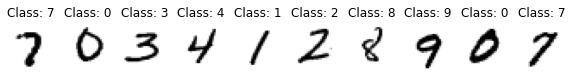

In [ ]:
for (X_train, y_train) in train_loader:
  break

pltsize = 1
plt.figure(figsize=(10 * pltsize, pltsize))
for i in range(10):
  plt.subplot(1, 10, i + 1)
  plt.axis('off')
  plt.imshow(X_train[i, :, :, :].numpy().reshape(28, 28), cmap='gray_r')
  plt.title('Class: ' + str(y_train[i].item()))

In [ ]:
def train(model, train_loader):
  model.train()
  train_loss = 0
  correct = 0

  for batch_idx, (image, label) in enumerate(train_loader):
    image = image.to(DEVICE)
    label = label.to(DEVICE)
    optimizer.zero_grad()
    output = model(image)
    loss = criterion(output, label)
    loss.backward()
    optimizer.step()

    train_loss += loss.item()
    prediction = output.max(1, keepdim = True)[1]
    correct += prediction.eq(label.view_as(prediction)).sum().item()
      
  train_loss /= len(train_loader.dataset)
  train_accuracy = 100. * correct / len(train_loader.dataset)
  return train_loss, train_accuracy

In [ ]:
def evaluate(model, test_loader):
  model.eval()
  test_loss = 0
  correct = 0

  with torch.no_grad():
    for image, label in test_loader:
      image = image.to(DEVICE)
      label = label.to(DEVICE)
      output = model(image)
      test_loss += criterion(output, label).item()
      prediction = output.max(1, keepdim = True)[1]
      correct += prediction.eq(label.view_as(prediction)).sum().item()

  test_loss /= len(test_loader.dataset)
  test_accuracy = 100. * correct / len(test_loader.dataset)
  return test_loss, test_accuracy

# 학습된 가중치를 Base로 모델을 전체 Train

이는 Pre - Trained Model의 가중치를 초기 가중치로 활용한 경우로 어느 정도 모델의 성능이 우수하다는 것을 확인 할 수 있다.

In [ ]:
model = torchvision.models.densenet121(pretrained = True)

output = model.features.conv0.out_channels
model.features.conv0 = nn.Conv2d(1, output, kernel_size=(7, 7), stride=(2, 2), padding=(4, 4), bias=False)
input = model.classifier.in_features
model.classifier = nn.Linear(input, out_features = 10)
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

Downloading: "https://download.pytorch.org/models/densenet121-a639ec97.pth" to /root/.cache/torch/hub/checkpoints/densenet121-a639ec97.pth


In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0024, 	Train Accuracy: 90.05 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.19 % 


[EPOCH: 2], 	Train Loss: 0.0006, 	Train Accuracy: 97.73 %, 	Test Loss: 0.0009, 	Test Accuracy: 96.77 % 


[EPOCH: 3], 	Train Loss: 0.0004, 	Train Accuracy: 98.28 %, 	Test Loss: 0.0004, 	Test Accuracy: 98.53 % 


[EPOCH: 4], 	Train Loss: 0.0003, 	Train Accuracy: 98.62 %, 	Test Loss: 0.0003, 	Test Accuracy: 98.76 % 


[EPOCH: 5], 	Train Loss: 0.0003, 	Train Accuracy: 98.74 %, 	Test Loss: 0.0004, 	Test Accuracy: 98.57 % 


[EPOCH: 6], 	Train Loss: 0.0003, 	Train Accuracy: 98.92 %, 	Test Loss: 0.0005, 	Test Accuracy: 97.98 % 


[EPOCH: 7], 	Train Loss: 0.0011, 	Train Accuracy: 98.15 %, 	Test Loss: 177.1540, 	Test Accuracy: 10.13 % 


[EPOCH: 8], 	Train Loss: 0.0007, 	Train Accuracy: 97.28 %, 	Test Loss: 0.0003, 	Test Accuracy: 98.90 % 


[EPOCH: 9], 	Train Loss: 0.0003, 	Train Accuracy: 98.80 %, 	Test Loss: 0.0003, 	Test Accuracy: 98.67 % 


[EPOCH: 10], 	Train Loss: 0.0003, 	Train Ac

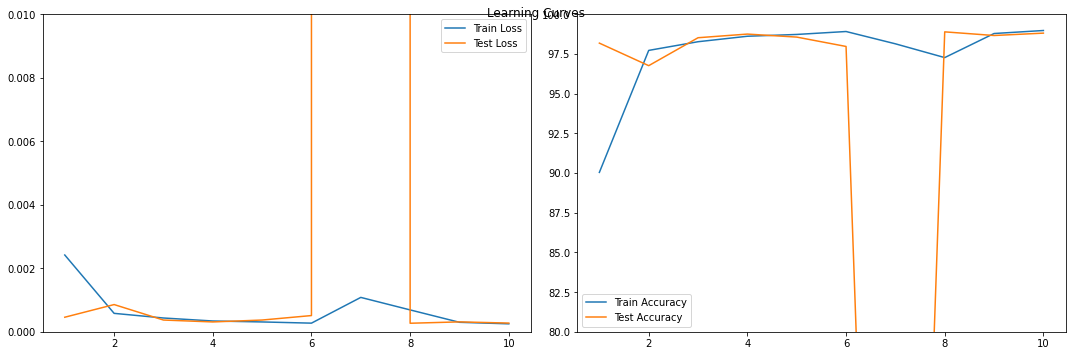

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# 학습된 가중치를 Freeze 하고 input Layer와 output Layer만 Train

이는 Pre - Trained Model의 가중치를 고정 시킨 상태로 Classifier 부분만 학습시킨 경우로 모델을 학습시켰던 데이터 셋과 헌재 모델을 학습시키는 데이터 셋의 유사성이 떨어져 모델의 성능이 별로 좋지 않다는 것을 확인 할 수 있다.

In [ ]:
model = torchvision.models.densenet121(pretrained = True)

# param Freenze
for param in model.parameters():
  param.requires_grad = False

# input Layer와 output Layer만을 학습시킴
output = model.features.conv0.out_channels
model.features.conv0 = nn.Conv2d(1, output, kernel_size=(7, 7), stride=(2, 2), padding=(4, 4), bias=False)
input = model.classifier.in_features
model.classifier = nn.Linear(input, out_features = 10)
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0052, 	Train Accuracy: 79.62 %, 	Test Loss: 0.0035, 	Test Accuracy: 86.73 % 


[EPOCH: 2], 	Train Loss: 0.0031, 	Train Accuracy: 88.90 %, 	Test Loss: 0.0028, 	Test Accuracy: 90.55 % 


[EPOCH: 3], 	Train Loss: 0.0028, 	Train Accuracy: 90.47 %, 	Test Loss: 0.0027, 	Test Accuracy: 90.93 % 


[EPOCH: 4], 	Train Loss: 0.0026, 	Train Accuracy: 91.55 %, 	Test Loss: 0.0024, 	Test Accuracy: 92.53 % 


[EPOCH: 5], 	Train Loss: 0.0026, 	Train Accuracy: 91.83 %, 	Test Loss: 0.0034, 	Test Accuracy: 91.15 % 


[EPOCH: 6], 	Train Loss: 0.0025, 	Train Accuracy: 92.30 %, 	Test Loss: 0.0026, 	Test Accuracy: 93.20 % 


[EPOCH: 7], 	Train Loss: 0.0024, 	Train Accuracy: 92.84 %, 	Test Loss: 0.0025, 	Test Accuracy: 92.69 % 


[EPOCH: 8], 	Train Loss: 0.0025, 	Train Accuracy: 92.81 %, 	Test Loss: 0.0023, 	Test Accuracy: 93.74 % 


[EPOCH: 9], 	Train Loss: 0.0024, 	Train Accuracy: 93.21 %, 	Test Loss: 0.0022, 	Test Accuracy: 93.39 % 


[EPOCH: 10], 	Train Loss: 0.0023, 	Train Accu

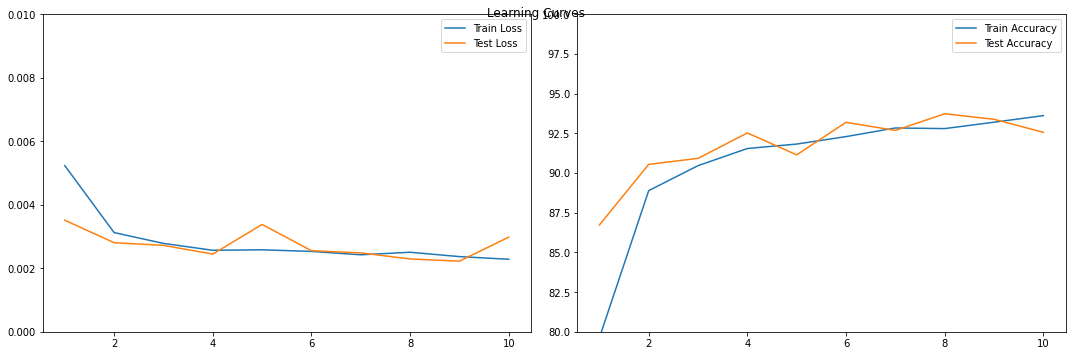

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# 모델의 구조만 불러와서 Train

이는 모델의 구조만 불러와서 학습시킨 경우로 학습된 가중치를 Base로 모델을 전체 학습 시켰던 경우와 모델의 성능이 유사하다는 것을 확인할 수 있다. 이를 통해서 DenseNet의 경우 모델 자체가 너무 크기 때문에 MNIST 데이터에 대해서는 좋은 성능을 가져다 주는 모델의 구조는 아니라는 것을 유추해볼 수 있다.

In [ ]:
model = torchvision.models.densenet121(pretrained = False)

output = model.features.conv0.out_channels
model.features.conv0 = nn.Conv2d(1, output, kernel_size=(7, 7), stride=(2, 2), padding=(4, 4), bias=False)
input = model.classifier.in_features
model.classifier = nn.Linear(input, out_features = 10)
model = model.to(DEVICE)

optimizer = torch.optim.Adam(model.parameters(), lr = 0.01)
criterion = nn.CrossEntropyLoss()

In [ ]:
result_list = []
for epoch in range(1, EPOCHS + 1):
  train_loss, train_accuracy = train(model, train_loader)
  test_loss, test_accuracy = evaluate(model, test_loader)
  print(f"\n[EPOCH: {epoch}], \tTrain Loss: {train_loss:.4f}, \tTrain Accuracy: {train_accuracy:.2f} %, \tTest Loss: {test_loss:.4f}, \tTest Accuracy: {test_accuracy:.2f} % \n")
  result = {
    'EPOCH': epoch,
    'Train Loss': train_loss,
    'Train Accuracy': train_accuracy,
    'Test Loss': test_loss,
    'Test Accuracy': test_accuracy}
  
  result_list.append(result)
result_df = pd.DataFrame(result_list)


[EPOCH: 1], 	Train Loss: 0.0012, 	Train Accuracy: 95.19 %, 	Test Loss: 0.0007, 	Test Accuracy: 97.15 % 


[EPOCH: 2], 	Train Loss: 0.0005, 	Train Accuracy: 98.13 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.09 % 


[EPOCH: 3], 	Train Loss: 0.0004, 	Train Accuracy: 98.65 %, 	Test Loss: 0.0004, 	Test Accuracy: 98.27 % 


[EPOCH: 4], 	Train Loss: 0.0003, 	Train Accuracy: 98.82 %, 	Test Loss: 0.0003, 	Test Accuracy: 98.82 % 


[EPOCH: 5], 	Train Loss: 0.0003, 	Train Accuracy: 98.97 %, 	Test Loss: 0.0006, 	Test Accuracy: 97.70 % 


[EPOCH: 6], 	Train Loss: 0.0002, 	Train Accuracy: 99.10 %, 	Test Loss: 0.0005, 	Test Accuracy: 98.41 % 


[EPOCH: 7], 	Train Loss: 0.0002, 	Train Accuracy: 99.04 %, 	Test Loss: 0.0002, 	Test Accuracy: 99.03 % 


[EPOCH: 8], 	Train Loss: 0.0002, 	Train Accuracy: 99.14 %, 	Test Loss: 0.0002, 	Test Accuracy: 98.98 % 


[EPOCH: 9], 	Train Loss: 0.0002, 	Train Accuracy: 99.15 %, 	Test Loss: 0.0003, 	Test Accuracy: 98.69 % 


[EPOCH: 10], 	Train Loss: 0.0002, 	Train Accu

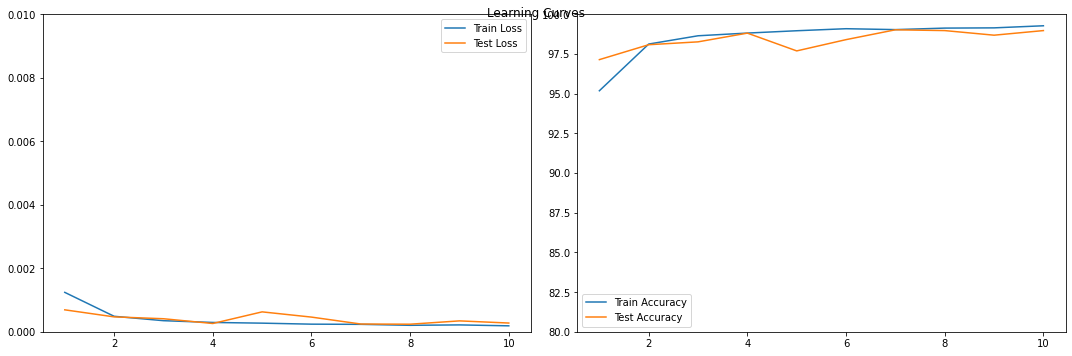

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
fig.suptitle('Learning Curves')
axes[0].plot(result_df['EPOCH'], result_df['Train Loss'], label='Train Loss')
axes[0].plot(result_df['EPOCH'], result_df['Test Loss'], label='Test Loss')
axes[0].set_ylim(0.0, 0.01)
axes[0].legend()

axes[1].plot(result_df['EPOCH'], result_df['Train Accuracy'], label='Train Accuracy')
axes[1].plot(result_df['EPOCH'], result_df['Test Accuracy'], label='Test Accuracy')
axes[1].set_ylim(80, 100)
axes[1].legend()
plt.tight_layout()
plt.show()

# 참고자료

- 파이썬 머신러닝 완벽 가이드, 권철민
- 파이썬 딥러닝 파이토치, 이경택
- 핸즈온 머신러닝, 박해선
- 데이터 사이언스 스쿨, https://datascienceschool.net/
- 데이터 분석 대표 대학생 연합 동아리 Tobigs, http://www.datamarket.kr/
- DeepLearnig.AI Course 1 ~ 5, Andrew Ng, https://www.youtube.com/c/Deeplearningai/playlists
- 모두를 위한 딥러닝 시즌 2, https://deeplearningzerotoall.github.io/season2/
- T아카데미 Scikit-Learn으로 다지는 머신러닝 기초, 강천성, https://tacademy.skplanet.com/live/player/onlineLectureDetail.action
- Pytorch로 시작하는 딥 러닝 입문, 유원준, https://wikidocs.net/book/2788
- https://pytorch.org/tutorials/beginner/finetuning_torchvision_models_tutorial.html
- https://pytorch.org/tutorials/beginner/transfer_learning_tutorial.html